# Explore Exercises

For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import pandas as pd
import requests
from imports import *

## Acquire

In [2]:
df = acquire.get_whole_sales()

In [3]:
df.shape

(913000, 15)

## Prepare

In [4]:
df = prepare.prep_sales(df)

In [5]:
df.head()

,item_id,sale_amount,sale_id,store_id,item_brand,item_name,item_price,item_upc12,item_upc14,store_address,store_city,store_state,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01,1,13.0,1,1,Riceland,Riceland American Jazmine Rice,0.84,35200264013,35200264013,12125 Alamo Ranch Pkwy,San Antonio,TX,78253,Jan,Tuesday,10.92
2013-01-01,12,26.0,211817,7,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,12018 Perrin Beitel Rd,San Antonio,TX,78217,Jan,Tuesday,218.40
2013-01-01,46,27.0,832657,7,Mama Marys,Pizza Sauce,4.65,35457770664,35457770664,12018 Perrin Beitel Rd,San Antonio,TX,78217,Jan,Tuesday,125.55
2013-01-01,12,54.0,213643,8,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,15000 San Pedro Ave,San Antonio,TX,78232,Jan,Tuesday,453.60
2013-01-01,12,35.0,215469,9,Mueller,Mueller Sport Care Basic Support Level Medium Elastic Knee Support,8.40,74676640211,74676640211,735 SW Military Dr,San Antonio,TX,78221,Jan,Tuesday,294.00


## Data Splitting

- Ideally all splits contain a season
- Human-based: Using domain knowledge, a cutoff is selected. (ex: use the last year as Test)
- Percentage-based: A cutoff is selected arbitrarily (ex: use the last 20% of observations as Test)
- Cross-validation-based: Break data into slices and use successive slices as train and test repeatedly

`sklearn.model_selection.TimeSeriesSplit`

### Human-Based

In [11]:
# Checking the date range
df.index.min()

Timestamp('2013-01-01 00:00:00')

In [12]:
df.index.max()

Timestamp('2017-12-31 00:00:00')

In [7]:
# Splitting train from 2013-2016, 2017 for test
train = df[:'2016']
test = df['2017']

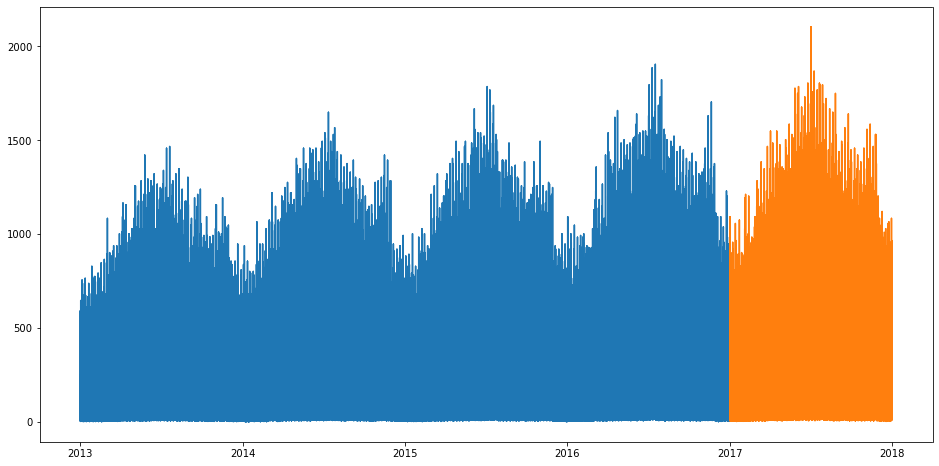

In [16]:
# Visualizing train, test set
plt.figure(figsize = (16,8))
plt.plot(train.index, train.sales_total)
plt.plot(test.index, test.sales_total)

## Explore

In [12]:
y = train.sales_total
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: sales_total, dtype: float64

### Basic Histogram (Ignoring Time Component)

<AxesSubplot:title={'center':'Distribution of Sales Total'}, xlabel='Sales Amount in USD', ylabel='Frequency'>

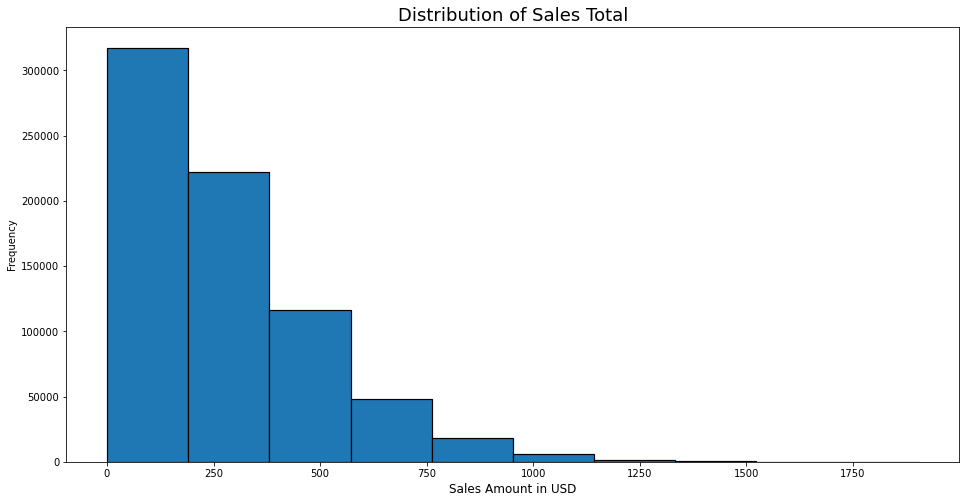

In [24]:
plt.figure(figsize=(16,8))
plt.title('Distribution of Sales Total', fontsize = 18)
plt.xlabel('Sales Amount in USD', fontsize = 12)
y.plot.hist(linewidth=1.2, edgecolor='black')

## Adding Time Component

In [21]:
train.groupby('month').sales_total.mean()

month
Apr    286.463913
Aug    308.319972
Dec    204.265461
Feb    205.001723
Jan    185.232810
Jul    348.595409
Jun    328.098415
Mar    246.694359
May    308.932679
Nov    287.761324
Oct    266.773078
Sep    286.252615
Name: sales_total, dtype: float64

<AxesSubplot:title={'center':'Sales Total by Month'}, xlabel='month', ylabel='sales_total'>

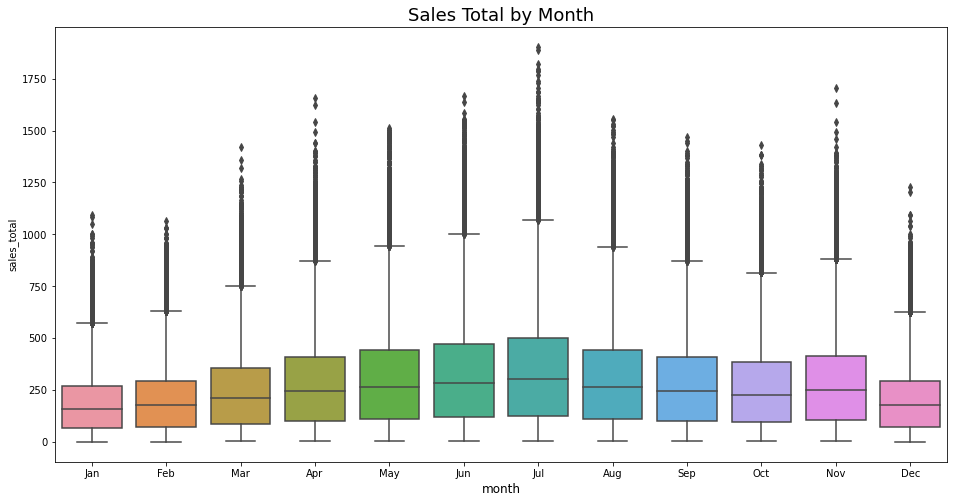

In [26]:
# Boxplot for each month
plt.figure(figsize = (16,8))
plt.title('Sales Total by Month', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
sns.boxplot(data = train, x = 'month', y = 'sales_total')

<AxesSubplot:title={'center':'Sales Total by Day of Week'}, xlabel='day_of_week', ylabel='sales_total'>

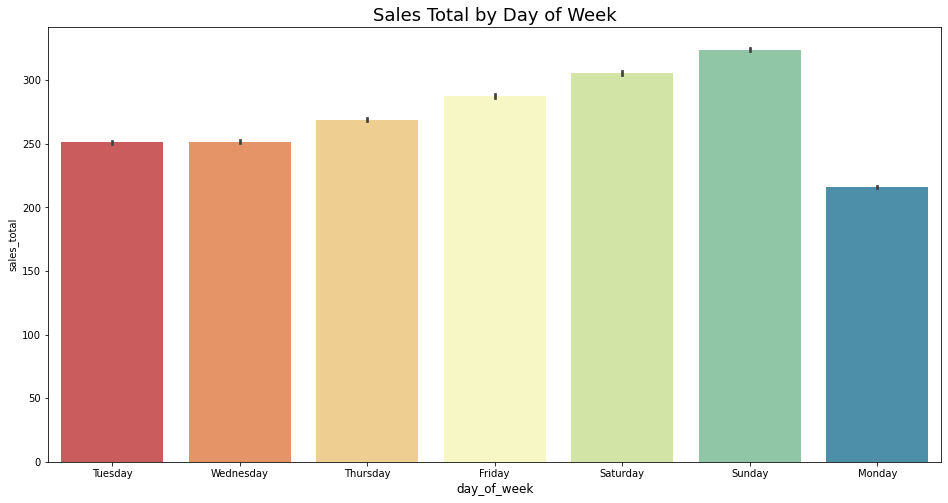

In [10]:
# Boxplot for each day of week
plt.figure(figsize = (16,8))
plt.title('Sales Total by Day of Week', fontsize = 18)
plt.xlabel('Month', fontsize = 12)
sns.barplot(data=train, x='day_of_week', y='sales_total',palette = 'Spectral')

### Visualizing Target Over Time

<AxesSubplot:title={'center':'Sales Total Over Time'}, xlabel='sale_date'>

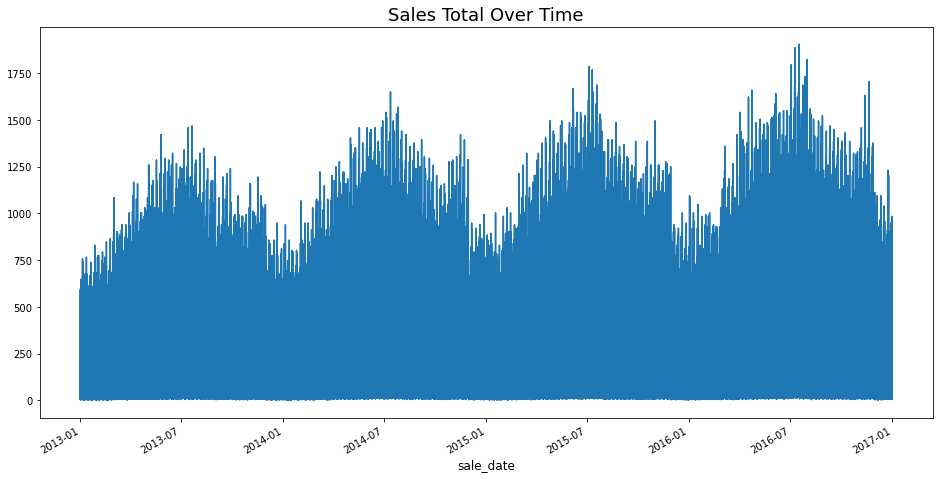

In [15]:
# Sales total over time
plt.figure(figsize = (16,8))
plt.title('Sales Total Over Time', fontsize = 18)
plt.xlabel('Sale Date', fontsize = 12)
y.plot()

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

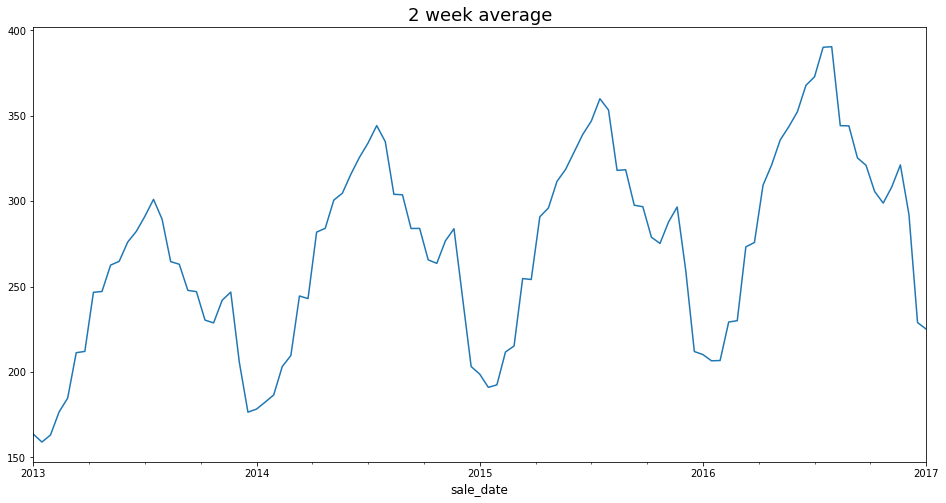

In [17]:
# Sales total by 2 week avg
plt.figure(figsize = (16,8))
plt.title('2 week average', fontsize = 18)
plt.xlabel('Sale Date', fontsize = 12)
y.resample('2W').mean().plot()

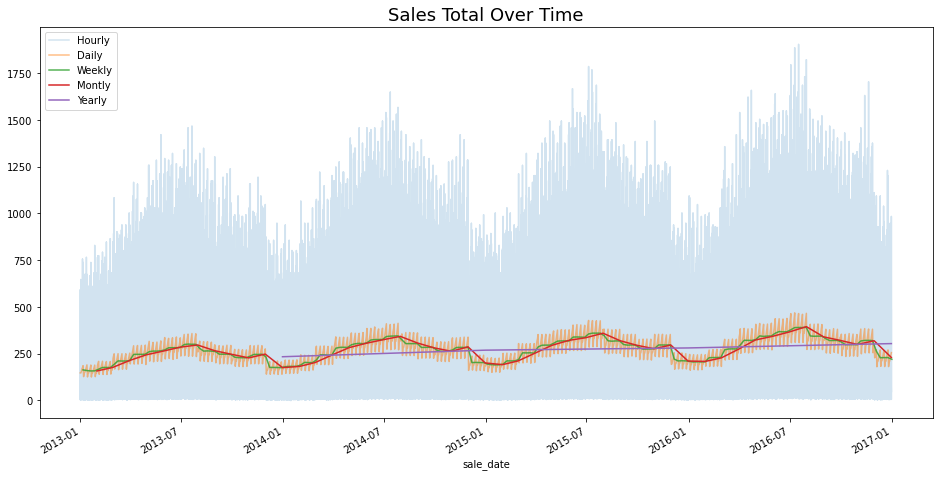

In [19]:
# Visualizing how aggregating smoothes out data
plt.figure(figsize = (16,8))
plt.title('Sales Total Over Time', fontsize = 18)
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

#### Calculating moving averages with the `.rolling` method

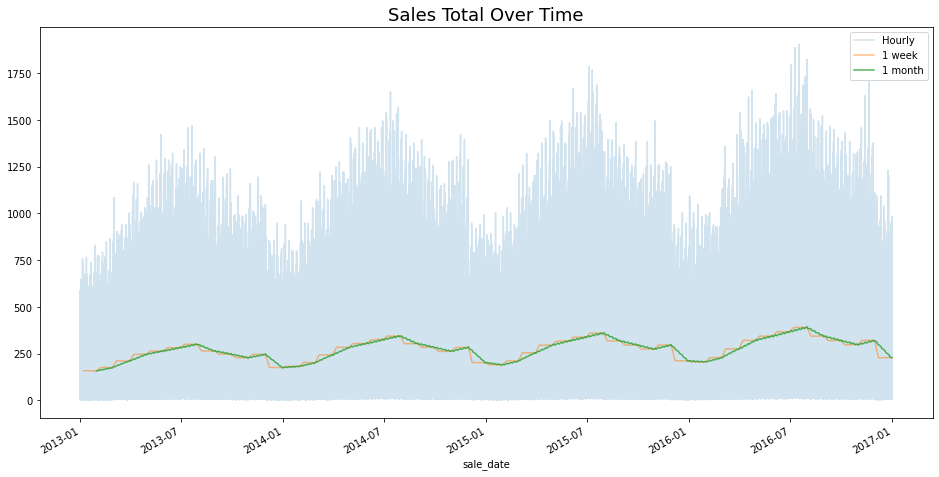

In [21]:
plt.figure(figsize = (16,8))
plt.title('Sales Total Over Time', fontsize = 18)
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(7).mean().plot(alpha=.5, label='1 week')
y.resample('D').mean().rolling(30).mean().plot(alpha=.8, label='1 month')
plt.legend()

### Visualizing Volatility

`.diff` let's us take the difference between the current and previous value

<AxesSubplot:title={'center':'Hourly Difference in Sales Total'}, xlabel='sale_date'>

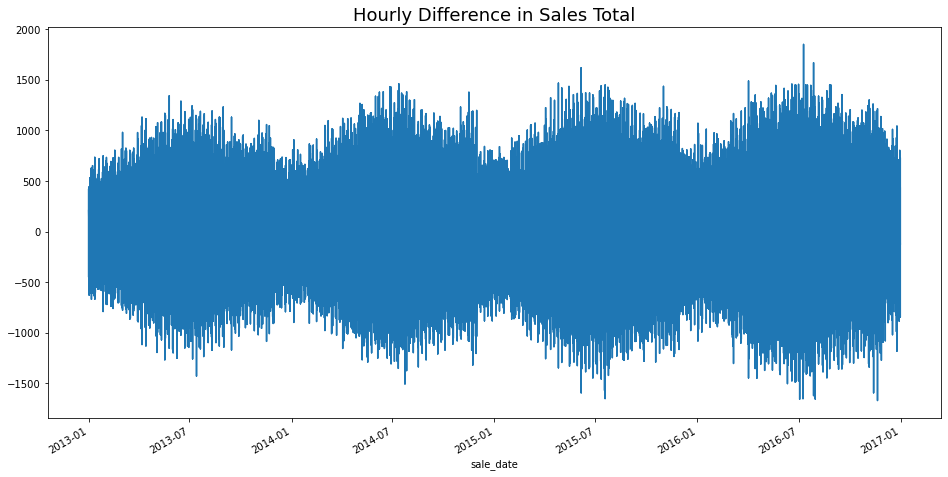

In [22]:
plt.figure(figsize = (16,8))
plt.title('Hourly Difference in Sales Total', fontsize = 18)
y.diff().plot()

This is a pretty noisy plot. Its difficult to make anything out. Perhaps looking at % change might give us more insight?

In [23]:
y

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
               ...  
2016-12-31    263.40
2016-12-31     92.07
2016-12-31    284.13
2016-12-31     53.38
2016-12-31    482.48
Name: sales_total, Length: 730500, dtype: float64

In [24]:
y.diff()

sale_date
2013-01-01       NaN
2013-01-01    207.48
2013-01-01    -92.85
2013-01-01    328.05
2013-01-01   -159.60
               ...  
2016-12-31    227.80
2016-12-31   -171.33
2016-12-31    192.06
2016-12-31   -230.75
2016-12-31    429.10
Name: sales_total, Length: 730500, dtype: float64

In [25]:
y.shift()

sale_date
2013-01-01       NaN
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
               ...  
2016-12-31     35.60
2016-12-31    263.40
2016-12-31     92.07
2016-12-31    284.13
2016-12-31     53.38
Name: sales_total, Length: 730500, dtype: float64

<AxesSubplot:title={'center':'Hourly % Change in Sales Total'}, xlabel='sale_date'>

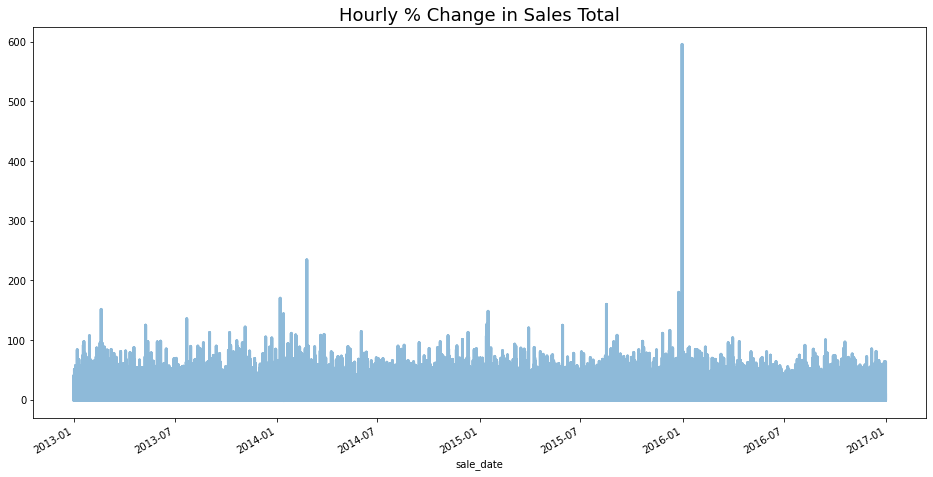

In [26]:
plt.figure(figsize = (16,8))
plt.title('Hourly % Change in Sales Total', fontsize = 18)
(y.diff() / y.shift()).plot(alpha=.5, lw=3)

Although it's slightly better, we really will need to resample to reduce some of this noise.

In [27]:
# Resample by week
y.resample('W').mean().diff()

sale_date
2013-01-06          NaN
2013-01-13    -3.607964
2013-01-20    -2.034483
2013-01-27     0.598663
2013-02-03     9.039631
                ...    
2016-12-04   -56.861163
2016-12-11   -35.209103
2016-12-18     0.738749
2016-12-25    -0.067643
2017-01-01    -8.951823
Freq: W-SUN, Name: sales_total, Length: 209, dtype: float64

<AxesSubplot:title={'center':'Average Week-to-Week Change in Sales Total'}, xlabel='sale_date'>

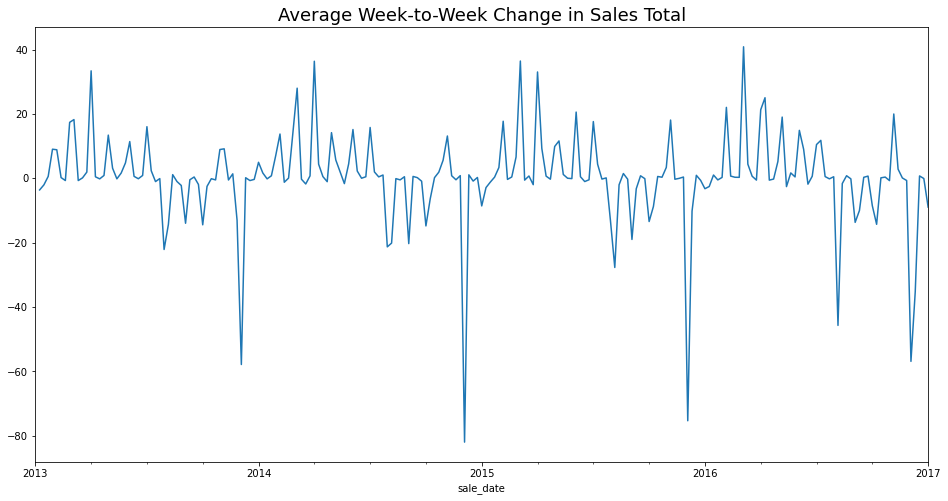

In [28]:
plt.figure(figsize = (16,8))
plt.title('Average Week-to-Week Change in Sales Total', fontsize = 18)
y.resample('W').mean().diff().plot()

<AxesSubplot:title={'center':'Average Week-to-Week % Change in Sales Total'}, xlabel='sale_date'>

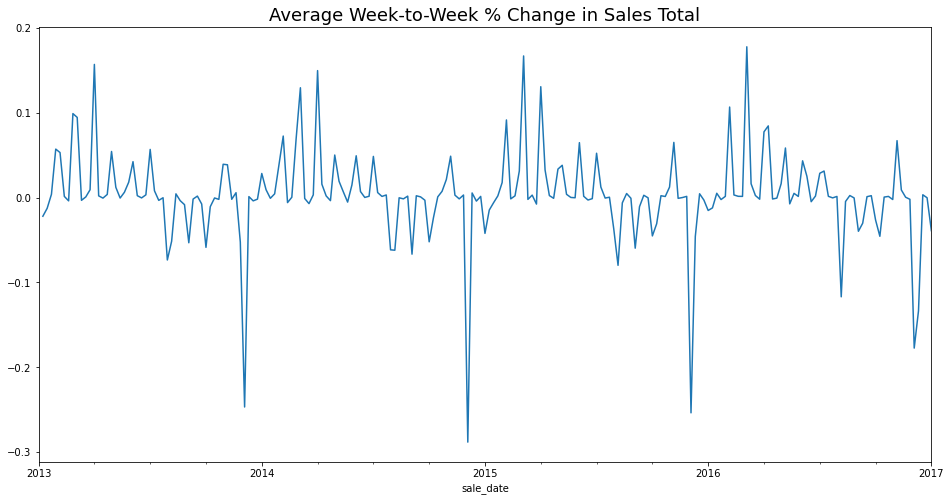

In [29]:
plt.figure(figsize = (16,8))
plt.title('Average Week-to-Week % Change in Sales Total', fontsize = 18)
(y.resample('W').mean().diff() / y.resample('W').mean().shift()).plot()

In [30]:
# Resample by month
y.resample('M').mean().shift()

sale_date
2013-01-31           NaN
2013-02-28    157.894723
2013-03-31    176.411855
2013-04-30    214.181650
2013-05-31    244.460082
2013-06-30    264.663123
2013-07-31    285.261279
2013-08-31    296.881241
2013-09-30    266.183375
2013-10-31    247.237694
2013-11-30    227.868064
2013-12-31    248.108656
2014-01-31    175.753692
2014-02-28    182.410791
2014-03-31    203.207122
2014-04-30    244.488991
2014-05-31    282.786091
2014-06-30    306.267538
2014-07-31    324.965376
2014-08-31    342.849100
2014-09-30    307.345466
2014-10-31    281.350430
2014-11-30    263.133772
2014-12-31    286.821036
2015-01-31    200.538977
2015-02-28    191.725206
2015-03-31    211.589839
2015-04-30    253.739390
2015-05-31    295.147608
2015-06-30    321.813672
2015-07-31    335.850784
2015-08-31    359.698008
2015-09-30    319.435676
2015-10-31    295.088416
2015-11-30    276.572155
2015-12-31    296.583045
2016-01-31    210.886208
2016-02-29    208.900519
2016-03-31    227.977512
2016-04-30    2

<AxesSubplot:title={'center':'Average Month-to-Month Change in Sales Total'}, xlabel='sale_date'>

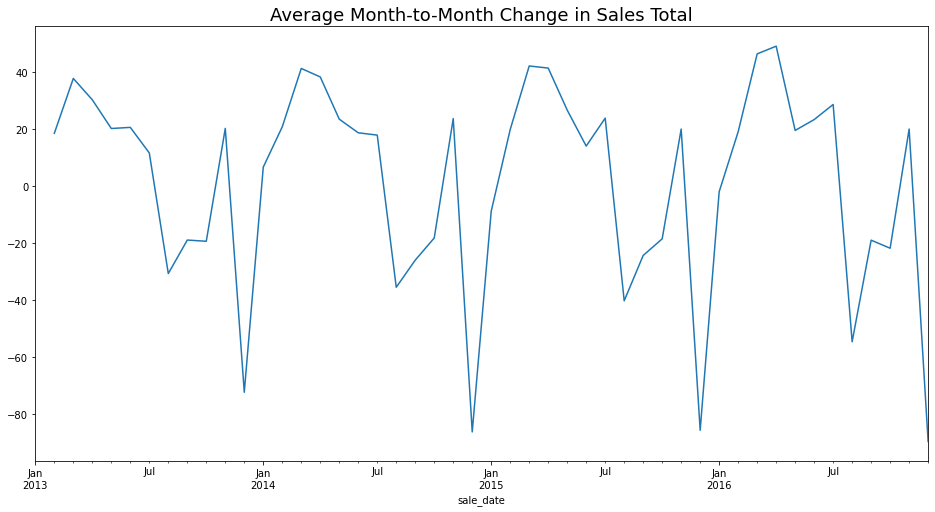

In [31]:
plt.figure(figsize = (16,8))
plt.title('Average Month-to-Month Change in Sales Total', fontsize = 18)
y.resample('M').mean().diff().plot()

<AxesSubplot:title={'center':'Average Month-to-Month % Change in Sales Total'}, xlabel='sale_date'>

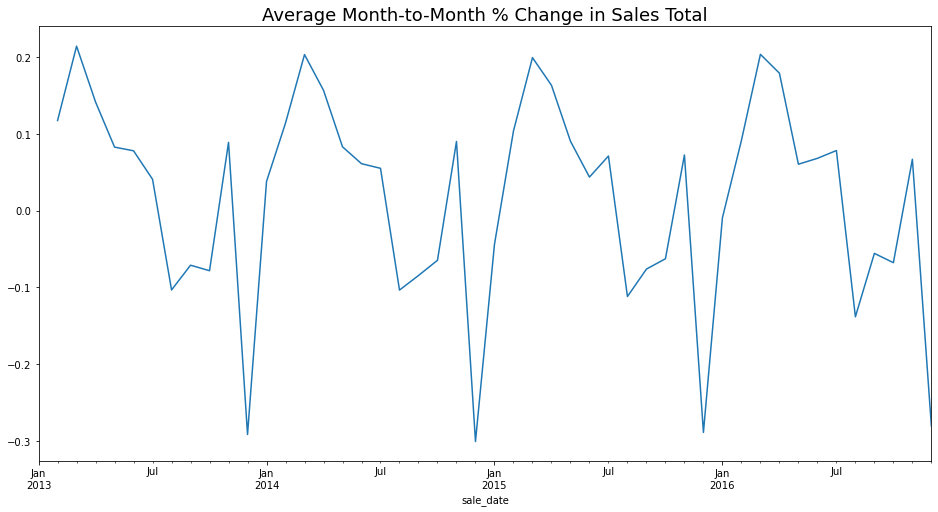

In [32]:
plt.figure(figsize = (16,8))
plt.title('Average Month-to-Month % Change in Sales Total', fontsize = 18)
(y.resample('M').mean().diff() / y.resample('M').mean().shift()).plot()

### Seasonal Plot
A seasonal plot shows the comparison of multiple seasons together. In this case, our season is one year in length. It is a line plot with the x-axis being the month of the year and the y axis being the target variable. Multiple lines are shown to show multiple years.

In [34]:
# Start off by getting average temperate for each year-month combination:
y.groupby([y.index.year, y.index.month]).mean()

sale_date  sale_date
2013       1            157.894723
           2            176.411855
           3            214.181650
           4            244.460082
           5            264.663123
           6            285.261279
           7            296.881241
           8            266.183375
           9            247.237694
           10           227.868064
           11           248.108656
           12           175.753692
2014       1            182.410791
           2            203.207122
           3            244.488991
           4            282.786091
           5            306.267538
           6            324.965376
           7            342.849100
           8            307.345466
           9            281.350430
           10           263.133772
           11           286.821036
           12           200.538977
2015       1            191.725206
           2            211.589839
           3            253.739390
           4            295.147608

In [35]:
# unstack is similar to pivot_table and be used to break up multi-level indices. 
# In this case, we turn the 0 index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0)

sale_date,2013,2014,2015,2016
sale_date,,,,
1,157.894723,182.410791,191.725206,208.900519
2,176.411855,203.207122,211.589839,227.977512
3,214.181650,244.488991,253.739390,274.367406
4,244.460082,282.786091,295.147608,323.461873
5,264.663123,306.267538,321.813672,342.986382
6,285.261279,324.965376,335.850784,366.316222
7,296.881241,342.849100,359.698008,394.953287
8,266.183375,307.345466,319.435676,340.315372
9,247.237694,281.350430,295.088416,321.333920


<AxesSubplot:xlabel='sale_date'>

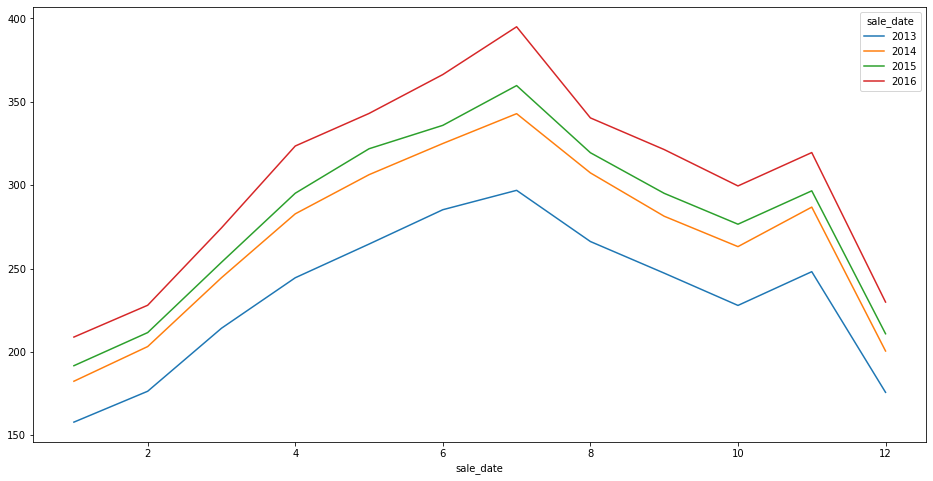

In [40]:
# Run .plot on this object
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(figsize = (16,8))

### Lag Plot

A lag plot is a scatter plot of a series with itself, shifted, or lagged. Put another way, a lag plot measures one value against the next or previous value.

If your data is sampled daily, you could think of `t` as 'today', `t+1` is 'tomorrow'. More generally, `t` is any given time period and `t+1` is the time period after. If your data is sampled weekly, `t` is any given week, and `t+1` is the following week.

In [41]:
train['y(t + 1)'] = train.sales_total.shift(-1)

[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

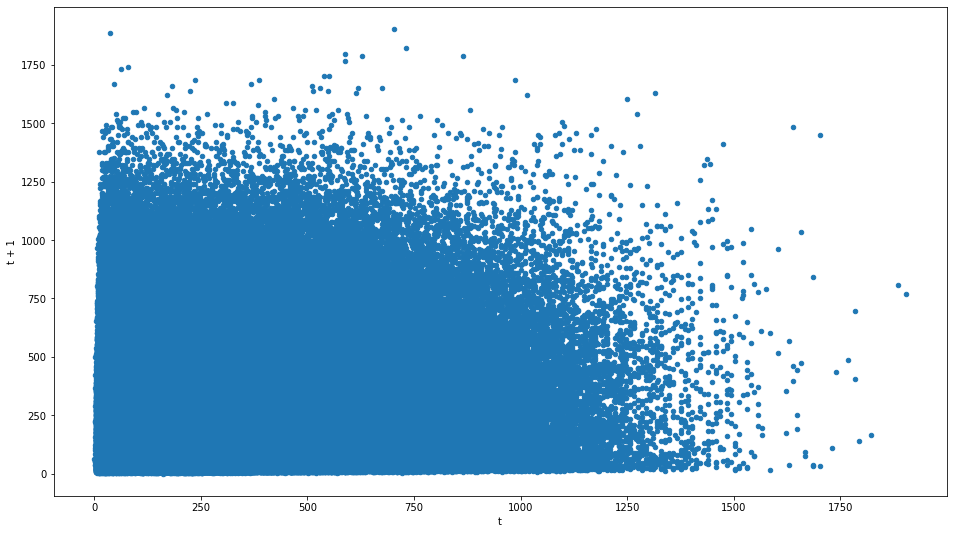

In [44]:
ax = train.plot.scatter(x='sales_total', y='y(t + 1)', figsize = (16,9))
ax.set(xlabel='t', ylabel='t + 1')